In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import xgboost
from xgboost import XGBClassifier




In [ ]:
data = pd.read_csv('/content/water_potability.csv')

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.describe() # we can se that same features have missing value

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# to check imbalance data


In [ ]:
data['Potability']

,Potability
0,0
1,0
2,0
3,0
4,0
...,...
3271,1
3272,1
3273,1
3274,1


In [ ]:
data['Potability'].value_counts()

,count
Potability,
0,1998
1,1278


to check how much percentage of data is imbalance

In [ ]:
print(round(len(data[data['Potability']==0]) / len(data)*100,2))

60.99


In [ ]:
print(round(len(data[data['Potability']==1]) / len(data)*100,2))

39.01


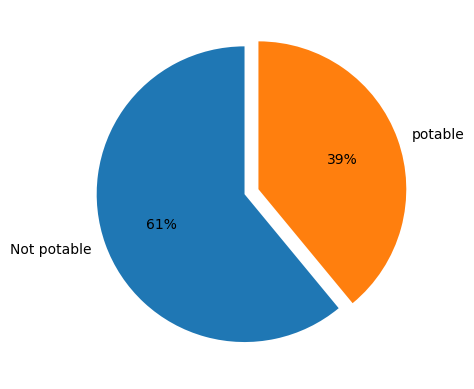

In [ ]:
plt.pie(data['Potability'].value_counts(),labels=['Not potable','potable'],autopct='%1.0f%%', explode= [0,0.1], startangle= 90)
plt.show()

#missing data

t0 check how much % data is missing

In [ ]:
data.isnull().mean()*100

,0
ph,14.987790
Hardness,0.000000
Solids,0.000000
Chloramines,0.000000
Sulfate,23.840049
Conductivity,0.000000
Organic_carbon,0.000000
Trihalomethanes,4.945055
Turbidity,0.000000
Potability,0.000000


In [ ]:
data.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


# if distribution of null column is normal than we can fill mean value in it

skewness should be betwen 0.5 to -0.5

ph


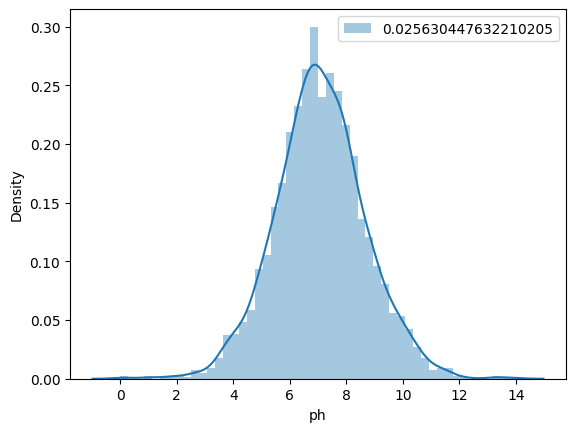

Sulfate


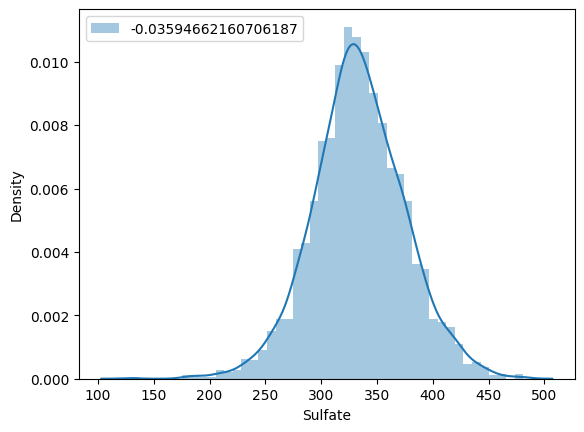

Trihalomethanes


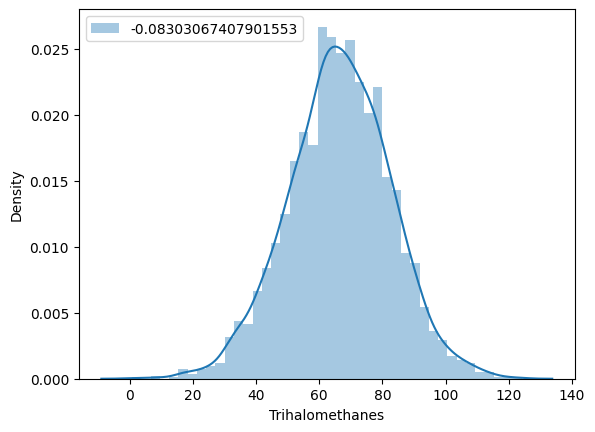

In [ ]:
for i in data:
  if data[i].isnull().sum()> 0:
    print(i)
    sns.distplot(data[i], label = data[i].skew())
    plt.legend()
    plt.show()

In [ ]:
for i in data :
  if data[i].isnull().sum()> 0:
    print(i)
    print(data[i].mean())
    print(data[i].median())
    print('\n')

ph
7.080794504276835
7.036752103833548


Sulfate
333.7757766108135
333.073545745888


Trihalomethanes
66.39629294676803
66.62248509808484




In [ ]:
for i in data :
  if data[i].isnull().sum()> 0:
    data[i].fillna(data[i].mean(), inplace = True)

# Duplicated data

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data[data.duplicated()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


# Outliers and anomalies

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ph                     1.592377
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               33.291119
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       20.018954
Turbidity              1.060609
Potability             1.000000
dtype: float64


In [ ]:
lower_limit  = Q1 - 1.5*IQR
upper_limit  = Q3 + 1.5*IQR
print( lower_limit)
print(upper_limit)

ph                    3.889107
Hardness            117.125160
Solids            -1832.417449
Chloramines           3.146221
Sulfate             267.157960
Conductivity        191.647579
Organic_carbon        5.328026
Trihalomethanes      26.619225
Turbidity             1.848797
Potability           -1.500000
dtype: float64
ph                    10.258615
Hardness             276.392834
Solids             44831.869873
Chloramines           11.096086
Sulfate              400.322434
Conductivity         655.879140
Organic_carbon        23.295427
Trihalomethanes      106.695040
Turbidity              6.091233
Potability             2.500000
dtype: float64


ph


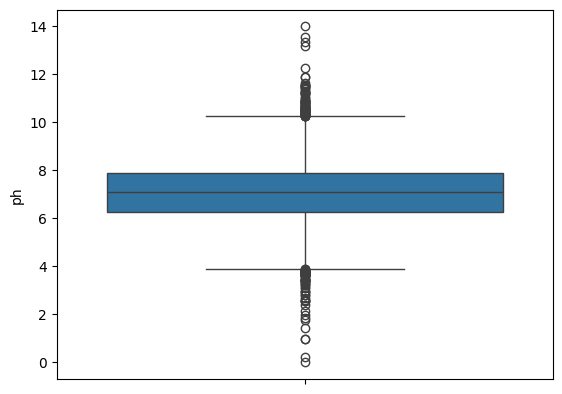

Hardness


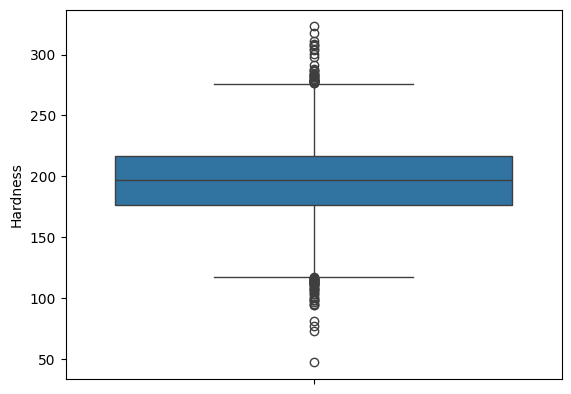

Solids


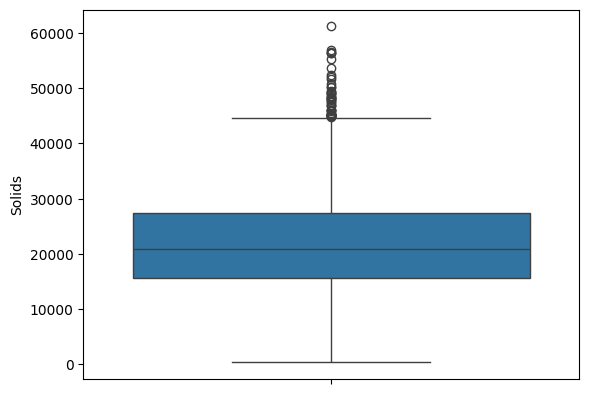

Chloramines


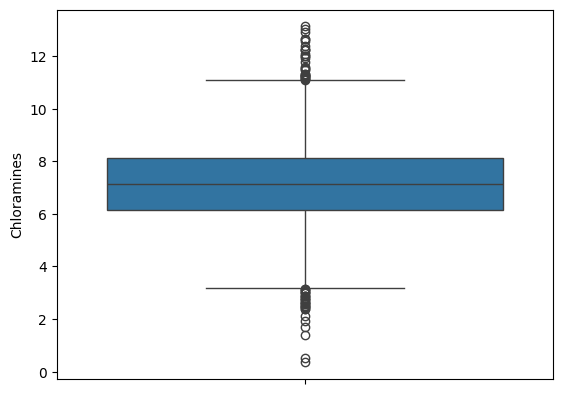

Sulfate


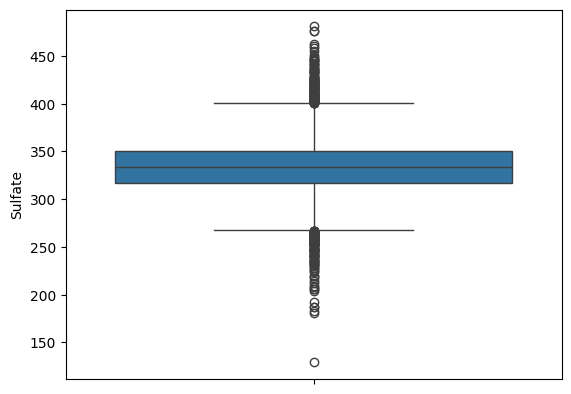

Conductivity


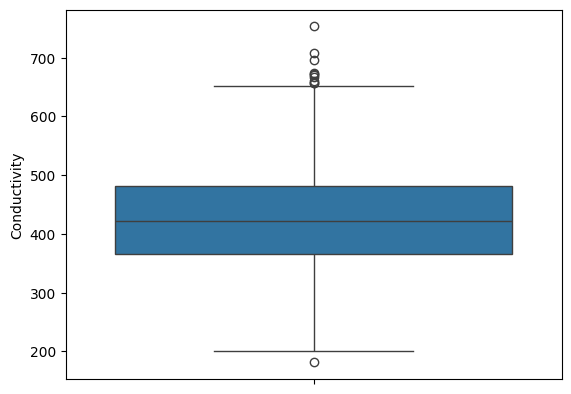

Organic_carbon


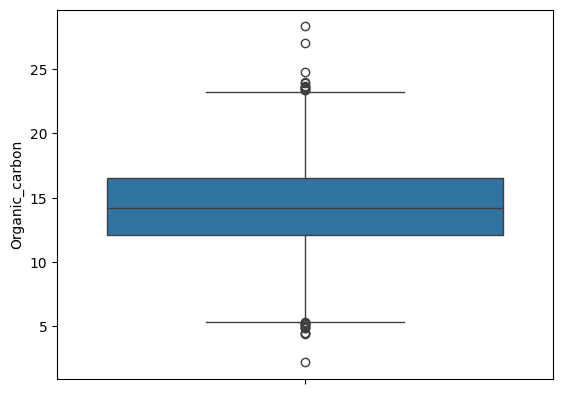

Trihalomethanes


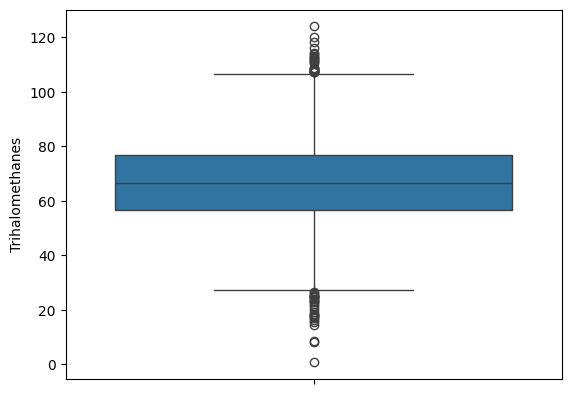

Turbidity


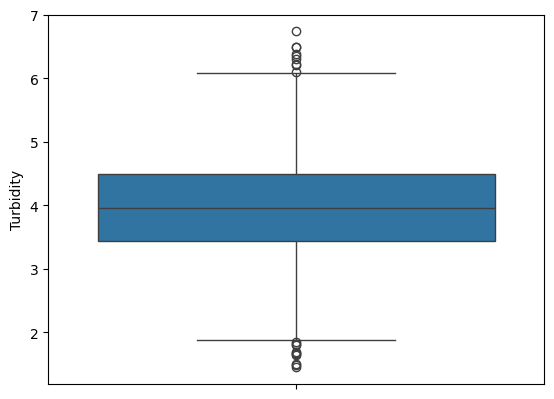

Potability


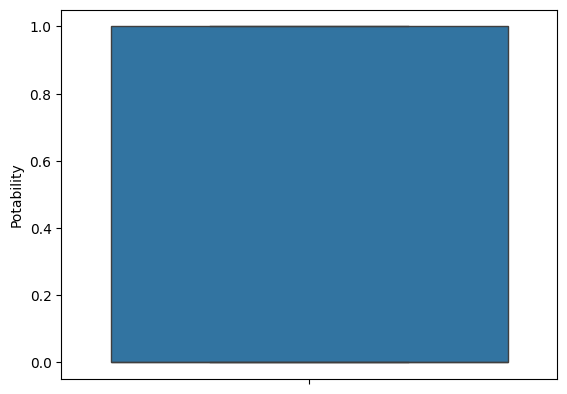

In [ ]:
for i in data :
  print(i)
  sns.boxplot(data[i])
  plt.show()


In [ ]:
data.shape

(3276, 10)

In [ ]:
df = data[~((data < lower_limit ) | (data > upper_limit)).any(axis=1)]

In [ ]:
df.shape

(2666, 10)

# Feature selection

without ouliers

In [ ]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


without outliers


In [ ]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.131362,-0.087036,-0.062888,0.016894,0.001943,0.026160,0.009172,-0.043034,-0.005949
Hardness,0.131362,1.000000,-0.045552,-0.035832,-0.027939,-0.030415,0.012463,-0.007093,-0.022362,-0.000710
Solids,-0.087036,-0.045552,1.000000,-0.040392,-0.110090,0.007087,0.026793,-0.024550,0.022801,0.005600
Chloramines,-0.062888,-0.035832,-0.040392,1.000000,0.024502,-0.015277,-0.000684,0.016574,-0.005415,0.013195
Sulfate,0.016894,-0.027939,-0.110090,0.024502,1.000000,-0.005850,-0.007588,-0.022269,-0.017310,-0.003741
Conductivity,0.001943,-0.030415,0.007087,-0.015277,-0.005850,1.000000,0.006515,-0.001138,0.007674,-0.001886
Organic_carbon,0.026160,0.012463,0.026793,-0.000684,-0.007588,0.006515,1.000000,-0.000059,-0.016705,-0.027090
Trihalomethanes,0.009172,-0.007093,-0.024550,0.016574,-0.022269,-0.001138,-0.000059,1.000000,-0.024269,0.014351
Turbidity,-0.043034,-0.022362,0.022801,-0.005415,-0.017310,0.007674,-0.016705,-0.024269,1.000000,0.004761
Potability,-0.005949,-0.000710,0.005600,0.013195,-0.003741,-0.001886,-0.027090,0.014351,0.004761,1.000000


# model selection


In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df['Potability']

In [ ]:
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Feature scaling

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


In [ ]:
lr = LogisticRegression()
lr.fit(X_train_sc,y_train)
print(f'Training Scaled accuracy {round(lr.score(X_train_sc,y_train),2)*100} %')
print(f'Testing Scaled accuracy {round(lr.score(X_test_sc,y_test),2)*100} %')
print(f'Training accuracy {round(lr.score(X_train,y_train),2)*100} %')
print(f'Testing accuracy {round(lr.score(X_test,y_test),2)*100} %')

Training Scaled accuracy 62.0 %
Testing Scaled accuracy 64.0 %
Training accuracy 38.0 %
Testing accuracy 36.0 %


In [ ]:
dtree = DecisionTreeClassifier(max_depth = 8)
dtree.fit(X_train,y_train)
print(f'Training accuracy {round(dtree.score(X_train,y_train),2)*100} %')
print(f'Testing accuracy {round(dtree.score(X_test,y_test),2)*100} %')

Training accuracy 77.0 %
Testing accuracy 64.0 %


In [ ]:
xgb = XGBClassifier(gamma= 0.7, reg_alpha=0.5, reg_lambda =0.2)
xgb.fit(X_train,y_train)
print(f'Training accuracy {round(xgb.score(X_train,y_train),2)*100} %')
print(f'Testing accuracy {round(xgb.score(X_test,y_test),2)*100} %')

Training accuracy 91.0 %
Testing accuracy 64.0 %


# model training using xgb

In [ ]:
y_pred_train= xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Model Evaluation

In [ ]:
confusion_matrix(y_train,y_pred_train)

array([[1314,   15],
       [ 186,  617]])

<Axes: >

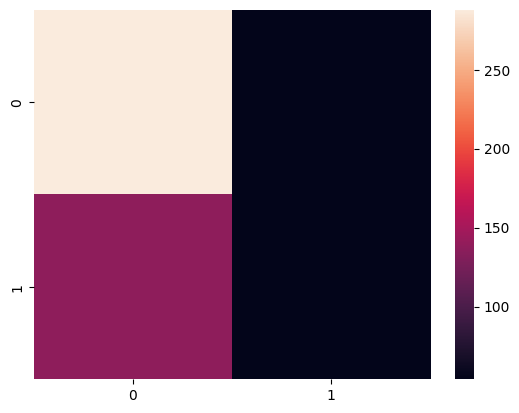

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_test))


In [ ]:
print("Accuracy Report for train data: ")
accuracy_score(y_train,y_pred_train)


Accuracy Report for train data: 


0.9057223264540337

In [ ]:
print("Accuracy Report for test data: ")
accuracy_score(y_test,y_pred_test)


Accuracy Report for test data: 


0.6404494382022472